# Projeto 2 - Ciência dos Dados

Nome: Eiki Luis Yamashiro 

Nome: Marcelo Cesário Miguel

Turma: 2A ENGENHARIA

___
# Classificador automático de sentimento


## Preparando o ambiente no jupyter:

In [457]:
%%capture

#Instalando o tweepy
!pip install tweepy

In [458]:
%matplotlib inline
import tweepy
import math
import os.path
import json
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd

___
## Autenticando no  Twitter

* Conta: @EikiMarcelo

___
## Etapas do projeto:

### Escolha de um produto e coleta das mensagens


Capturando os dados do twitter:

Salvando os dados em uma planilha Excel:

___
### Classificando as mensagens na coragem

Esta etapa é manual. Faça a mesma pelo Excel.

In [459]:
#def de limpar palavras
import re 

def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    punctuation = '[!\-.:?;]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed
#Excel
skol_read=pd.read_excel("skol.xlsx")

In [460]:
#Limpeza e separação por relevancia
skol_read.Treinamento.apply(cleanup)
skol_read.rename(columns={'Unnamed: 1':'relevante'},inplace=True)
# Excel dos Testes
skol_read_teste=pd.read_excel("skol.xlsx","Teste")
skol_read_teste.Teste.apply(cleanup)
#Relevante 0
skol_relevante_0=skol_read[skol_read.relevante==0]

#Relevante 1
skol_relevante_1=skol_read[skol_read.relevante==1]
print ("Len relevante 0:",len(skol_relevante_0),"",
       "Len relevante 1:",len(skol_relevante_1))

Len relevante 0: 185  Len relevante 1: 115


In [461]:
# Separando as palavras Relevancia 1
" ".join(skol_relevante_1["Treinamento"]).split()
palavras=pd.DataFrame("".join(skol_relevante_1["Treinamento"]).split())
palavras_relevancia_1=palavras[0].value_counts()
#Tabela Relativa 
palavras_relevancia_1_relativa=palavras[0].value_counts(True)

In [462]:
# Separando as palavras Relevancia 0
" ".join(skol_relevante_0["Treinamento"]).split()
palavras=pd.DataFrame("".join(skol_relevante_0["Treinamento"]).split())
palavras[0].value_counts()
palavras_relevancia_0=palavras[0].value_counts()
palavras_relevancia_0

#Tabela Relativa 
palavras_relevancia_0_relativa=palavras[0].value_counts(True)

___
### Montando o Classificador Naive-Bayes

Para ensinar o classificador, iremos nos basear no Teorema de Bayes.

In [463]:
#   Definindo a função que recebe o dataframe, e uma string que define se é o 'Treinamento' ou o 'Teste'. A função retorna uma
#lista com valores dos indices 1 ou 0. Sendo 1 para relevante e 0 para irrelevante.
def classificador(dataframe,plani):
#============================================PARTE===UM===DA===FUNÇÃO==========================================================

#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_Relevância-_-_Zero-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_

#--------------------------------------------Criando--uma--lista--de--frases---------------------------------------------------

#A lista_frase, é uma lista que os indices são strings que são as frases. Já a lista_palavra, é uma lista que os indices são
#listas onde cada indice é uma palavra. 
#Exemplo: 
#lista_frase==['Oi tudo bem', 'Meu nome é Eiki']
#lista_palavra==[['Oi','tudo','bem'],['Meu','nome','é','Eiki']]
    i=0
    lista_frase=[]
    lista_palavra = []
    if plani == 'Teste':
        while i <=199:
            a=skol_read_teste.loc[i,'{0}'.format(plani)]
            lista_frase.append(a)
            x = lista_frase[i].split(" ")
            lista_palavra.append(x)
            i+=1
        lista_palavra
    else:
        while i <=299:
            a=skol_read.iloc[i,0]
            lista_frase.append(a)
            x = lista_frase[i].split(" ")
            lista_palavra.append(x)
            i+=1
        lista_palavra
#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_Chutando-_-_o-_-_numero-_-_de-_-_palavras-_-_PT-_-_BR-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
    t = 1/10e6
#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_Laplace-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-   

#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_

#A função irá usar a string que define se é o teste ou o treinamento para dar o valor exato para a variável "var".
#A lista mult_prob é uma lista que contém mais listas, que possuem o valor da probabilidade de cada palavra em relação à 
#relevância 0, e a lista produto_prob, é uma lista que já contém a probabilidade de cada frase.
    i = 0
    produto_prob = []
    if plani == "Teste":
        var = 199
    else:
        var = 299
    while i <= var:
        k = 0
        mult_prob = []
        while k < len(lista_palavra[i]):
            palavra = lista_palavra[i][k]
            if palavra not in palavras_relevancia_0_relativa:
                prob = t
            else:
                prob = palavras_relevancia_0_relativa[palavra] + t
            mult_prob.append(prob)
            k+=1
        logp = 0
#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-Smoothing_-_-de_-_-Laplace_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
        for e in mult_prob:
            logp=logp+math.log(e)
        produto = logp
        produto_prob.append(produto)
        i+=1
    Lista_prob_0 = produto_prob
#============================================PARTE===DOIS===DA===FUNÇÃO========================================================

#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_Relevância-_-_Um-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_

#Os mesmos passos feitos na parte um da função serão repetidos na parte dois, entretanto será a probabilidade em relação 
#à relevância 1.
    i=0
    lista_frase=[]
    lista_palavra = []
    if plani == 'Teste':
        while i <=199:
            a=skol_read_teste.loc[i,'{0}'.format(plani)]
            lista_frase.append(a)
            x = lista_frase[i].split(" ")
            lista_palavra.append(x)
            i+=1
        lista_palavra
    else:
        while i <=299:
            a=skol_read.iloc[i,0]
            lista_frase.append(a)
            x = lista_frase[i].split(" ")
            lista_palavra.append(x)
            i+=1
        lista_palavra
    i = 0
    produto_prob = []
    if plani == "Teste":
        var = 199
    else:
        var = 299
    while i <= var:
        k = 0
        mult_prob = []
        while k < len(lista_palavra[i]):
            palavra = lista_palavra[i][k]
            if palavra not in palavras_relevancia_1_relativa:
                prob = t
            else:
                prob = palavras_relevancia_1_relativa[palavra] + t
            mult_prob.append(prob)
            k+=1
        logp = 0
        for e in mult_prob:
            logp=logp+math.log(e)
        produto = logp
        produto_prob.append(produto)
        i+=1
    Lista_prob_1 = produto_prob
#============================================PARTE===TRÊS===DA===FUNÇÃO========================================================

#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-Classifica_-_-em_-_-1_-_-ou_-_-0-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

#Agora, a função irá comparar a probabilidade da mesma frase em relação à relevância 1 ou 0, a maior probabilidade irá definir
#se a frase é relevância 1 ou 0.
    lista_analise = []
    i=0
    analise = 0
    while i< len(Lista_prob_1):
        if Lista_prob_1[i] > Lista_prob_0[i]:
            analise = 1
        else:
            analise = 0
        lista_analise.append(analise)
        i+=1
    dataframe['Analise'] = lista_analise
    return(dataframe)

### <font color = "red"> Validando as analises:

#### Adicionando a coluna do resultado:

In [464]:
skol_read

,Treinamento,relevante
0,rt @2kdaladeira: @whsallas @silva22anny tbm ma...,0
1,olha gente elas bebendo suco😍😍 com essas caras...,0
2,um open de skol beats em limeira seria uma boa...,1
3,@bonagabriella kkkkk tem coisas q merecem um r...,0
4,@cecitoptop aiai tá louca \nnem skol beats na ...,0
5,@qgdaanitta representa a skol como ninguém \nr...,0
6,rt @sggrazii: skol beats e ice é exceção https...,0
7,@skolvikings_br @billsbrazil @enefeudazueira c...,0
8,rt @daumasgeo: óbvio que ela foi embora tava d...,1
9,rt @netoverissimom: dia de skol😂🍺☀️ https://t....,0


In [465]:
#Definindo a relevancia com o classificador
relevancia_classificada = classificador(skol_read,'Treinamento')
skol_read

,Treinamento,relevante,Analise
0,rt @2kdaladeira: @whsallas @silva22anny tbm ma...,0,0
1,olha gente elas bebendo suco😍😍 com essas caras...,0,0
2,um open de skol beats em limeira seria uma boa...,1,1
3,@bonagabriella kkkkk tem coisas q merecem um r...,0,0
4,@cecitoptop aiai tá louca \nnem skol beats na ...,0,0
5,@qgdaanitta representa a skol como ninguém \nr...,0,0
6,rt @sggrazii: skol beats e ice é exceção https...,0,0
7,@skolvikings_br @billsbrazil @enefeudazueira c...,0,0
8,rt @daumasgeo: óbvio que ela foi embora tava d...,1,1
9,rt @netoverissimom: dia de skol😂🍺☀️ https://t....,0,0


In [466]:
def validadora(df, relevancia, analise):
#Essa função retorna o dataframe com uma série nova, que apresenta se a classificação foi correta ou não.
#Essa função vai validar as classificações em True ou False, sendo True para a classificação correta e False para a incorreta.
    i = 0
    verifica = []
    while i < len(skol_read):
        ver = False
        if df["{0}".format(relevancia)][i] == df["{0}".format(analise)][i]:
            ver = True
        verifica.append(ver)
        i+=1
    df['Validadora'] = verifica
    return(df)

In [467]:
skol_read = validadora(skol_read, 'relevante', 'Analise')
skol_read

,Treinamento,relevante,Analise,Validadora
0,rt @2kdaladeira: @whsallas @silva22anny tbm ma...,0,0,True
1,olha gente elas bebendo suco😍😍 com essas caras...,0,0,True
2,um open de skol beats em limeira seria uma boa...,1,1,True
3,@bonagabriella kkkkk tem coisas q merecem um r...,0,0,True
4,@cecitoptop aiai tá louca \nnem skol beats na ...,0,0,True
5,@qgdaanitta representa a skol como ninguém \nr...,0,0,True
6,rt @sggrazii: skol beats e ice é exceção https...,0,0,True
7,@skolvikings_br @billsbrazil @enefeudazueira c...,0,0,True
8,rt @daumasgeo: óbvio que ela foi embora tava d...,1,1,True
9,rt @netoverissimom: dia de skol😂🍺☀️ https://t....,0,0,True


##### <font color = 'red'> Definindo a função performance: </font>
    
Essa função irá verificar a performance do nosso classificador em verdadeiro positivo (frases relevantes que são classificadas como relevantes), verdadeiro negativo (frases irrelevantes que são classificadas como irrelevantes), falso positivo (frases irrelevantes classificadas como relevantes) e falso negativo (frases relevantes classificadas como irrelevantes).

In [468]:
def performance(df):
    i = 0
    dic = {}
    contagem_verdadeiro_positivo = 0
    contagem_verdadeiro_negativo = 0
    contagem_falso_positivo = 0
    contagem_falso_negativo = 0

    while i < len(skol_read):
        if df["Validadora"][i] == True:
            if df["relevante"][i] == 1:
                contagem_verdadeiro_positivo+=1
            else:
                contagem_verdadeiro_negativo+=1
        else:
            if skol_read["relevante"][i] == 1:
                contagem_falso_positivo+=1
            else:
                contagem_falso_negativo+=1
        i+=1
    porc_v_n = contagem_verdadeiro_negativo/300
    porc_v_p = contagem_verdadeiro_positivo/300
    porc_f_n = contagem_falso_negativo/300
    porc_f_p = contagem_falso_positivo/300
    dic['Verdadeiro_Positivo'] = porc_v_p
    dic['Verdadeiro_Negativo'] = porc_v_n
    dic['Falso_Positivo'] = porc_f_p
    dic['Falso_Negativo'] = porc_f_n
    return(dic)

In [469]:
performance_ = performance(skol_read)
performance_

{'Verdadeiro_Positivo': 0.36,
 'Verdadeiro_Negativo': 0.59,
 'Falso_Positivo': 0.023333333333333334,
 'Falso_Negativo': 0.02666666666666667}

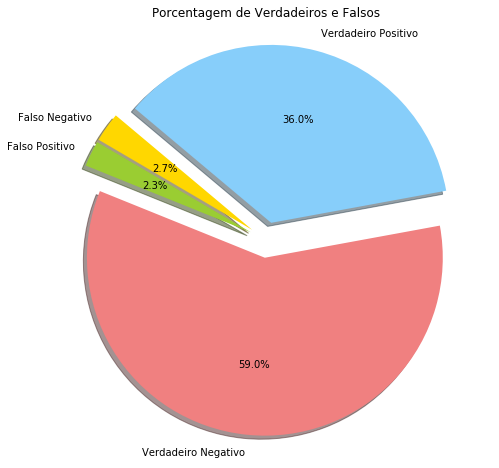

In [470]:
# Data to plot
labels = 'Falso Negativo', "Falso Positivo", "Verdadeiro Negativo", 'Verdadeiro Positivo'
sizes = [performance_['Falso_Negativo'], performance_["Falso_Positivo"], performance_["Verdadeiro_Negativo"], performance_['Verdadeiro_Positivo']]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize=[8,8])
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Porcentagem de Verdadeiros e Falsos")
plt.show()

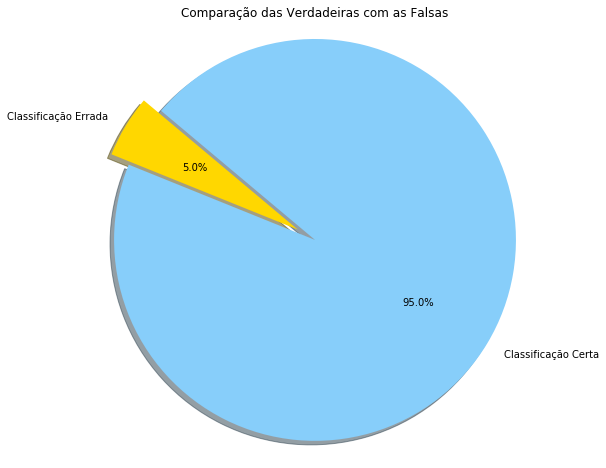

In [471]:
classi_true = performance_["Verdadeiro_Negativo"] + performance_['Verdadeiro_Positivo']
classi_false = performance_['Falso_Negativo'] + performance_["Falso_Positivo"]
labels = "Classificação Errada", "Classificação Certa"
sizes = [classi_false, classi_true]
colors = ['gold', 'lightskyblue']
explode = (0.05, 0.05)

# Plot
plt.figure(figsize=[8,8])
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Comparação das Verdadeiras com as Falsas")
plt.axis('equal')
plt.show()

___
### Verificando a performance

Agora você deve testar o seu classificador com a base de Testes.

In [472]:
skol_read_teste = classificador(skol_read_teste, 'Teste')
skol_read_teste

,Teste,Analise
0,rt @uncovereventos: o que vcs acharam do open ...,0
1,sentado no chão em frente a uma distribuidora ...,0
2,rt @dablyubfr: já tô ligado legal novinha qual...,0
3,@migueluiz_ meu pai bebe skol,1
4,rt @lucasbelarmin17: expobip com brahma e skol...,0
5,@dani19l @aguardani louco de skol beats é outro,1
6,rt @russin22_: [4/9 13:32] skol: sexta churras...,0
7,quando chega no final do copo/eu insistindo em...,1
8,rt @clarafxa: não me responsabilizo pelas minh...,0
9,rt @taekookiil: amiga beije este homem ele vai...,0


___
### Concluindo

In [473]:
skol_read_teste['Analise'].value_counts()


0    109
1     91
Name: Analise, dtype: int64

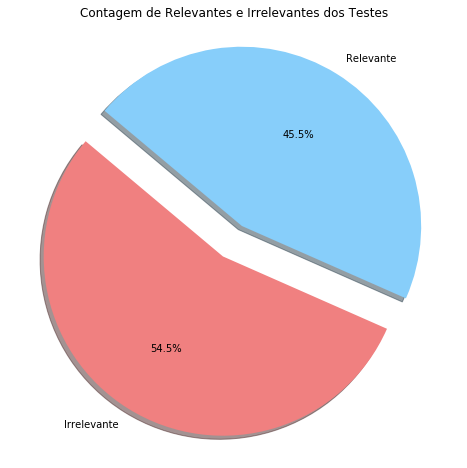

In [474]:
contagem_0 = 109
contagem_1 = 91
# Data to plot
labels = 'Irrelevante', "Relevante"
sizes = contagem_0, contagem_1
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize=[8,8])
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Contagem de Relevantes e Irrelevantes dos Testes")
plt.show()

## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados

# Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**